In [1]:
import matplotlib.pyplot as plt
import numpy as np

from numpy import *
import xlrd
plt.rc('text',usetex = True)
plt.rc('font', family='serif')

In [2]:
Theta = np.arange(0,np.pi,np.pi/1000)
M_prof = np.zeros(len(Theta))
H_prof = np.zeros(len(Theta))

In [3]:
Theta[999],M_prof[999]

(3.1384510609362035, 0.0)

In [4]:
M_prof[0:75] = 0.5 + 0.5/Theta[75]*Theta[0:75]
M_prof[75:425] = 1
M_prof[425:575] = 0.9*Theta[425:575]/(Theta[425] - Theta[575]) +(0.1 + 0.9*Theta[575]/(Theta[575] - Theta[425]))
M_prof[575:925] = 0.1
M_prof[925:999] = 0.4*Theta[925:999]/(Theta[999] - Theta[925]) + 0.1 + 0.4*Theta[925]/(Theta[925] - Theta[999])

H_prof[0:125] = 0
H_prof[125:375] = 0.8
H_prof[375:625] = 0
H_prof[625:875] = -0.8
H_prof[875:1000] = 0


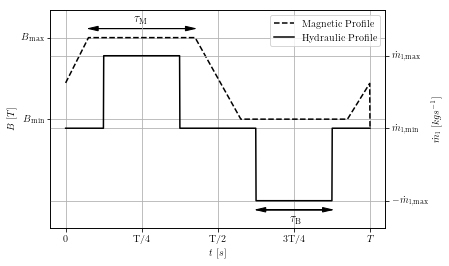

In [5]:
fig, ax1 = plt.subplots()

ax1.plot(Theta,M_prof,'k--', label =  'Magnetic Profile')

ax2 = ax1.twinx()

ax2.plot(Theta,H_prof,'k-', label =  'Hydraulic Profile')
ax1.set_ylim([-1.1,1.3])

ax2.set_ylim([-1.1,1.3])

ax1.grid()
ax1.set_ylabel('$B \ [T]$')
ax2.set_ylabel('$\dot{m}_\mathrm{l} \ [kg s^{-1}$]')
ax1.set_xlabel(r'$ t \ [s]$')
ax2.grid()

x1 = [0,np.pi/4, np.pi/2, 3*np.pi/4, np.pi]
squad = ['0','T/4','T/2','3T/4','$T$']

y1 = [0.1, 1]
B_label = ['$B_\mathrm{min}$','$B_\mathrm{max}$']

ax1.set_xticks(x1)
ax1.set_xticklabels(squad, minor=False, rotation=0)

ax1.text(Theta[250]*0.9,1.15,r'$\tau_\mathrm{M}$',size = 12)
ax2.text(Theta[750]*0.98,-1.05,r'$\tau_\mathrm{B}$',size = 12)

ax2.arrow(Theta[625],-0.9,Theta[875]-Theta[625]-0.1,0,head_width=0.05, head_length=0.1, fc='k', ec='k')
ax2.arrow(Theta[875],-0.9,-(Theta[875]-Theta[625]-0.1),0,head_width=0.05, head_length=0.1, fc='k', ec='k')

ax1.arrow(Theta[75],1.1,Theta[425]-Theta[75]-0.1,0,head_width=0.05, head_length=0.1, fc='k', ec='k')
ax1.arrow(Theta[425],1.1,-(Theta[425]-Theta[75]-0.1),0,head_width=0.05, head_length=0.1, fc='k', ec='k')

y2 = [-0.8, 0,0.8]
B_label_2 = ['$ - \dot{m}_\mathrm{l,max}$','$ \dot{m}_\mathrm{l,min}$','$\dot{m}_\mathrm{l,max}$']

ax1.set_yticks(y1)
ax1.set_yticklabels(B_label, minor=False, rotation=0)

ax2.set_yticks(y2)
ax2.set_yticklabels(B_label_2, minor=False, rotation=0)

fig.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

fig.savefig('Profiles.eps',format = 'eps', dpi=1200,bbox_inches='tight')

'T/4'